In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Preplacementdata.csv")

In [3]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [4]:
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_3728\2437120965.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

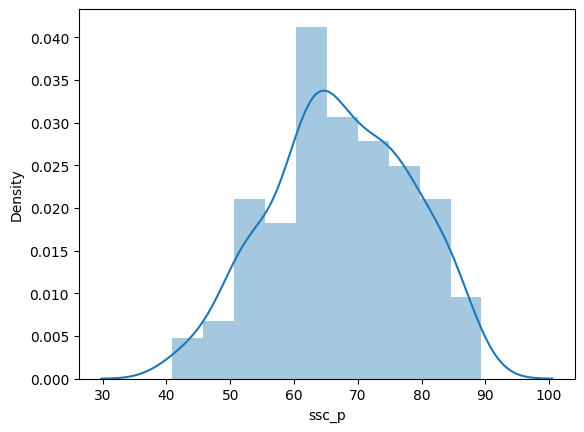

In [5]:
sns.distplot(dataset["ssc_p"])



# how to find probability density function?

In [6]:
# !pip install matplotlib seaborn scipy numpy pandas

In [7]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample=dataset
    # calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f' % (sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #sample probability for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value)for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob



Mean=67.303,Standard Deviation=10.827
The area between range(40,60):0.23035961179550077


C:\Users\user\AppData\Local\Temp\ipykernel_3728\3217089554.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')


np.float64(0.23035961179550077)

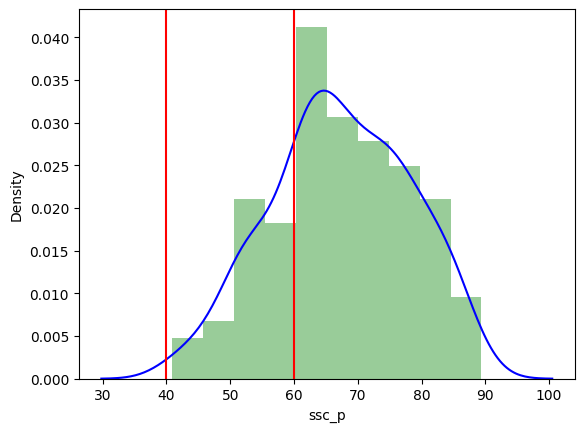

In [8]:
get_pdf_probability(dataset["ssc_p"],40,60)

In [17]:
# CDF----cumulative density function----->calculation

In [9]:
! pip install statsmodels

In [14]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
ecdf(80)

np.float64(0.8651162790697674)

In [12]:
!pip install statsmodels

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
ecdf(50)

np.float64(0.05581395348837209)

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
ecdf(70)

np.float64(0.6093023255813953)

# standard normal deviation---->calculation

In [20]:
def stdNBGgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score)/len(z_score)
    #z_score.std()

C:\Users\user\AppData\Local\Temp\ipykernel_3728\1426362586.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score)/len(z_score)


TypeError: unsupported operand type(s) for /: 'Axes' and 'int'

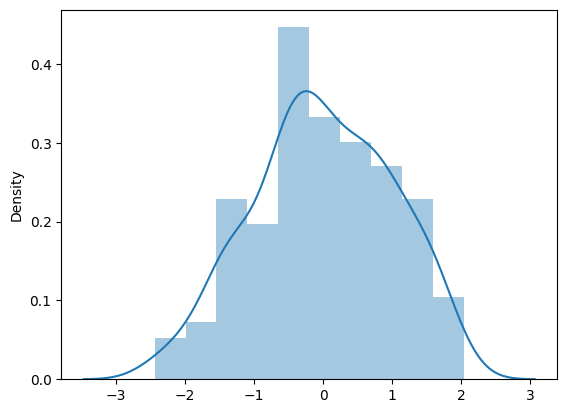

In [21]:
stdNBGgraph(dataset["ssc_p"])

In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

def stdNBGgraph(dataset):
    # Calculate Z-scores using scipy's zscore function
    z_score = zscore(dataset)
    
    # Create a Seaborn histogram with the Z-scores
    sns.histplot(z_score, kde=True, color='blue', stat='density')
    
    # Display the plot
    plt.title("Standardized Z-Score Distribution")
    plt.xlabel("Z-Score")
    plt.ylabel("Density")
    plt.show()

    # Return the Z-scores for further analysis if needed
    return z_score

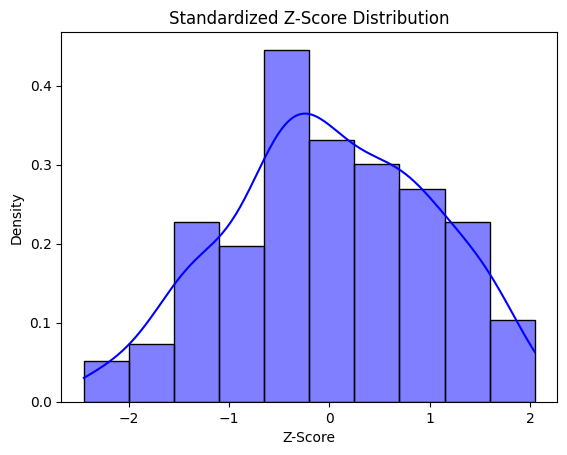

In [23]:
z_scores = stdNBGgraph(dataset['ssc_p'])
